# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install mplfinance

     |████████████████████████████████| 71 kB 816 kB/s eta 0:00:01


In [4]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [5]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [6]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [7]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [8]:
start = '2021'
end = datetime(2022, 11, 24)

yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-06 to 2022-12-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    int64  
 5   Adj Close  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [10]:
yahoo

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-06,320.100006,306.339996,308.130005,317.869995,21758300,317.869995
2021-12-07,326.540009,321.000000,321.570007,322.809998,18794000,322.809998
2021-12-08,332.750000,323.070007,325.000000,330.559998,19937700,330.559998
2021-12-09,336.130005,328.000000,329.540009,329.820007,16879200,329.820007
2021-12-10,335.029999,326.369995,332.559998,329.750000,14528000,329.750000
...,...,...,...,...,...,...
2022-11-29,110.940002,108.540001,109.540001,109.459999,23899200,109.459999
2022-11-30,118.160004,109.379997,109.510002,118.099998,43348600,118.099998
2022-12-01,121.199997,118.400002,119.199997,120.440002,36551400,120.440002


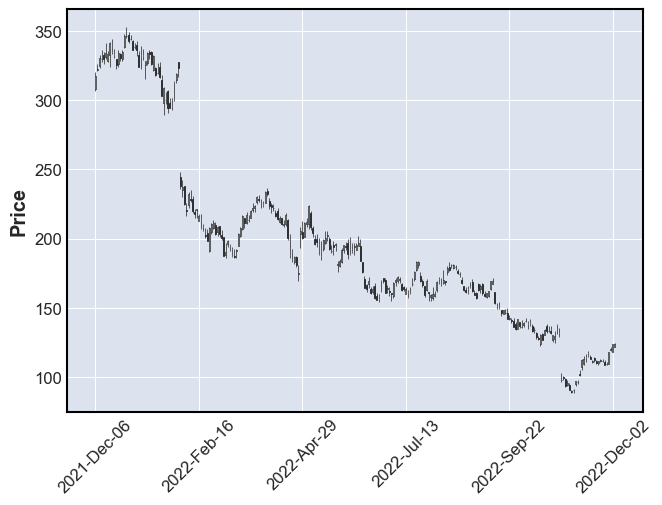

<Figure size 640x480 with 0 Axes>

In [9]:
mpf.plot(yahoo.drop('Adj Close', axis=1), type='candle')
plt.tight_layout()

### IEX

IEX is an alternative exchange started in response to the HFT controversy and portrayed in Michael Lewis' controversial Flash Boys. It aims to slow down the speed of trading to create a more level playing field and has been growing rapidly since launch in 2016 while still small with a market share of around 2.5% in June 2018.

> **Note:** IEX now requires an [API](https://iexcloud.io/) key after registration for (free) account that you can store as environment variable and retrieve as illustrated below, or pass directly via keyword argument to `pandas_datareader`.

In [8]:
IEX_API_KEY=os.getenv('IEX_API_KEY')

In [9]:
start = datetime(2015, 2, 9)
# end = datetime(2017, 5, 24)

iex = web.DataReader('FB', 'iex', start, api_key=IEX_API_KEY)
iex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1519 entries, 2015-02-09 to 2021-02-19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1519 non-null   float64
 1   high    1519 non-null   float64
 2   low     1519 non-null   float64
 3   close   1519 non-null   float64
 4   volume  1519 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 71.2+ KB


In [10]:
iex.tail()

,open,high,low,close,volume
date,,,,,
2021-02-12,270.520,271.18,268.34,270.50,9097597
2021-02-16,270.800,276.60,270.05,273.97,15417243
2021-02-17,271.240,273.97,269.58,273.57,12763240
2021-02-18,269.565,271.95,266.03,269.39,15249134
2021-02-19,269.860,270.27,260.15,261.56,25622587


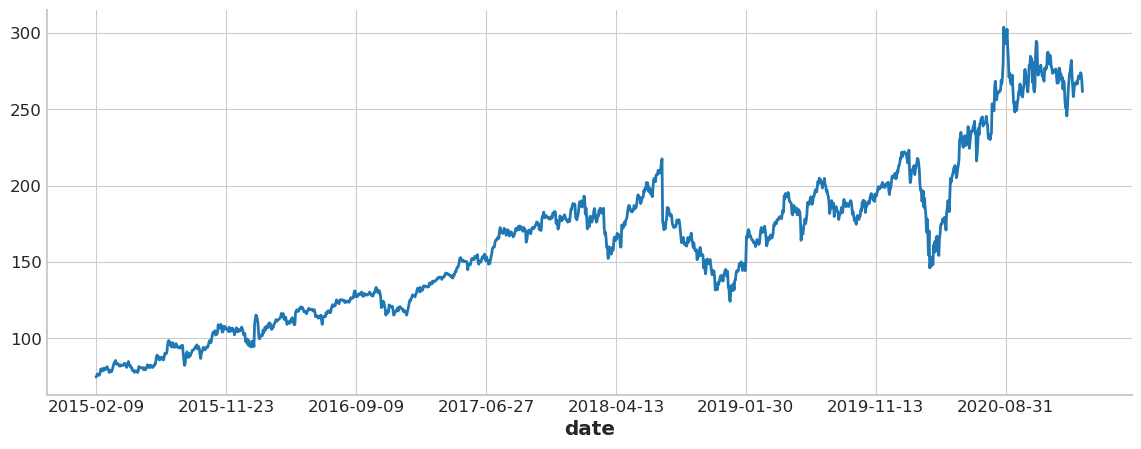

In [11]:
sns.set_style('whitegrid')
iex.close.plot(figsize=(14, 5))
sns.despine()

#### Book Data

In addition to historical EOD price and volume data, IEX provides real-time depth of book quotations that offer an aggregated size of orders by price and side. This service also includes last trade price and size information.

DEEP is used to receive real-time depth of book quotations direct from IEX. The depth of book quotations received via DEEP provide an aggregated size of resting displayed orders at a price and side, and do not indicate the size or number of individual orders at any price level. Non-displayed orders and non-displayed portions of reserve orders are not represented in DEEP.

DEEP also provides last trade price and size information. Trades resulting from either displayed or non-displayed orders matching on IEX will be reported. Routed executions will not be reported.

Only works on trading days.

In [12]:
book = web.get_iex_book('AAPL')

In [13]:
list(book.keys())

['symbol',
 'marketPercent',
 'volume',
 'lastSalePrice',
 'lastSaleSize',
 'lastSaleTime',
 'lastUpdated',
 'bids',
 'asks',
 'systemEvent',
 'tradingStatus',
 'opHaltStatus',
 'ssrStatus',
 'securityEvent',
 'trades',
 'tradeBreaks']

In [14]:
orders = pd.concat([pd.DataFrame(book[side]).assign(side=side) for side in ['bids', 'asks']])
orders.head()

,side


In [15]:
for key in book.keys():
    try:
        print(f'\n{key}')
        print(pd.DataFrame(book[key]))
    except:
        print(book[key])


symbol
AAPL

marketPercent
0.01824

volume
1874997

lastSalePrice
125.98

lastSaleSize
3

lastSaleTime
1614027994379

lastUpdated
1614031191208

bids
Empty DataFrame
Columns: []
Index: []

asks
Empty DataFrame
Columns: []
Index: []

systemEvent
{'systemEvent': 'C', 'timestamp': 1614031800007}

tradingStatus
{'status': 'T', 'reason': '    ', 'timestamp': 1613996038606}

opHaltStatus
{'isHalted': False, 'timestamp': 1613996038606}

ssrStatus
{'isSSR': False, 'detail': ' ', 'timestamp': 1613996038606}

securityEvent
{'securityEvent': 'MarketClose', 'timestamp': 1614027600000}

trades
      price  size     tradeId  isISO  isOddLot  isOutsideRegularHours  \
0   125.980     3  2565301038   True      True                   True   
1   126.010    20  2561192133  False      True                  False   
2   126.010    35  2561162510  False      True                  False   
3   126.005   100  2560819178  False     False                  False   
4   126.005   100  2560535358  False     False

In [16]:
pd.DataFrame(book['trades']).head()

,price,size,tradeId,isISO,isOddLot,isOutsideRegularHours,isSinglePriceCross,isTradeThroughExempt,timestamp
0,125.980,3,2565301038,True,True,True,False,False,1614027994379
1,126.010,20,2561192133,False,True,False,False,False,1614027597753
2,126.010,35,2561162510,False,True,False,False,False,1614027597658
3,126.005,100,2560819178,False,False,False,False,False,1614027596970
4,126.005,100,2560535358,False,False,False,False,False,1614027596307


### Quandl

Obtain Quandl [API Key](https://www.quandl.com/tools/api) and store in environment variable as `QUANDL_API_KEY`.

In [17]:
symbol = 'FB.US'

quandl = web.DataReader(symbol, 'quandl', '2015-01-01')
quandl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2018-03-27 to 2015-01-02
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        813 non-null    float64
 1   High        813 non-null    float64
 2   Low         813 non-null    float64
 3   Close       813 non-null    float64
 4   Volume      813 non-null    float64
 5   ExDividend  813 non-null    float64
 6   SplitRatio  813 non-null    float64
 7   AdjOpen     813 non-null    float64
 8   AdjHigh     813 non-null    float64
 9   AdjLow      813 non-null    float64
 10  AdjClose    813 non-null    float64
 11  AdjVolume   813 non-null    float64
dtypes: float64(12)
memory usage: 82.6 KB


### FRED

In [18]:
start = datetime(2010, 1, 1)

end = datetime(2013, 1, 27)

gdp = web.DataReader('GDP', 'fred', start, end)

gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13 entries, 2010-01-01 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     13 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [19]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2010-01-01 to 2013-01-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  37 non-null     float64
 1   CPILFESL  37 non-null     float64
dtypes: float64(2)
memory usage: 888.0 bytes


### Fama/French

In [20]:
from pandas_datareader.famafrench import get_available_datasets
get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [21]:
ds = web.DataReader('5_Industry_Portfolios', 'famafrench')
print(ds['DESCR'])

5 Industry Portfolios
---------------------

This file was created by CMPT_IND_RETS using the 202012 CRSP database. It contains value- and equal-weighted returns for 5 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (59 rows x 5 cols)
  1 : Average Equal Weighted Returns -- Monthly (59 rows x 5 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 5 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 5 cols)
  4 : Number of Firms in Portfolios (59 rows x 5 cols)
  5 : Average Firm Size (59 rows x 5 cols)
  6 : Sum of BE / Sum of ME (5 rows x 5 cols)
  7 : Value-Weighted Average of BE/ME (5 rows x 5 cols)


### World Bank

In [22]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9266,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9268,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9270,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9271,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [23]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    51588.761434
        2018    51476.200774
        2017    51170.475841
        2016    50193.750410
        2015    50262.027666

### OECD

In [24]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

Country                  Japan                                                 \
Source     Administrative data                                    Survey data   
Series               Employees Union members Trade union  density   Employees   
Year                                                                            
2010-01-01             37100.0       12509.0                 33.7         NaN   
2011-01-01             37460.0       12437.0                 33.2         NaN   
2012-01-01             38990.0       12309.0                 31.6         NaN   
2013-01-01             40120.0       12369.0                 30.8         NaN   
2014-01-01             41020.0       12526.0                 30.5         NaN   
2015-01-01             42090.0       12520.0                 29.7         NaN   
2016-01-01             43010.0       12418.0                 28.9         NaN   
2017-01-01             43830.0       12343.0                 28.2         NaN   
2018-01-01             45650.0       12227.0                 26.8         NaN   

Country                                             United States  \
Source                                        Administrative data   
Series     Union members Trade union  density           Employees   
Year                                                                
2010-01-01           NaN                  NaN             80520.0   
2011-01-01           NaN                  NaN             83482.0   
2012-01-01           NaN                  NaN             89675.0   
2013-01-01           NaN                  NaN             89950.0   
2014-01-01           NaN                  NaN                 NaN   
2015-01-01           NaN                  NaN                 NaN   
2016-01-01           NaN                  NaN                 NaN   
2017-01-01           NaN                  NaN                 NaN   
2018-01-01           NaN                  NaN                 NaN   

Country                                                                  \
Source                                        Survey data                 
Series     Union members Trade union  density   Employees Union members   
Year                                                                      
2010-01-01       19634.0                 24.4     80519.0       17403.0   
2011-01-01       19695.0                 23.6     83481.0       19335.0   
2012-01-01       20055.0                 22.4     89673.0       20986.0   
2013-01-01       19843.0                 22.1     89950.0       20095.0   
2014-01-01           NaN                  NaN         NaN           NaN   
2015-01-01           NaN                  NaN     91079.0       17717.0   
2016-01-01           NaN                  NaN     97406.0       16996.0   
2017-01-01           NaN                  NaN     99846.0       16975.0   
2018-01-01           NaN                  NaN    104642.0       17002.0   

Country                          
Source                           
Series     Trade union  density  
Year                             
2010-01-01                 21.6  
2011-01-01                 23.2  
2012-01-01                 23.4  
2013-01-01                 22.3  
2014-01-01                  NaN  
2015-01-01                 19.5  
2016-01-01                 17.4  
2017-01-01                 17.0  
2018-01-01                 16.2



### Stooq

Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of [fix](https://github.com/pydata/pandas-datareader/issues/594)

In [25]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

47

In [26]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-02-22 to 2016-02-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [27]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-02-22,3885.55,3902.92,3874.71,3876.50,2748914392
2021-02-19,3921.16,3930.41,3903.07,3906.71,2315685076
2021-02-18,3915.86,3921.98,3885.03,3913.97,2025989354
2021-02-17,3918.50,3933.61,3900.43,3931.33,2161952392
2021-02-16,3939.61,3950.43,3923.85,3932.59,2305147298


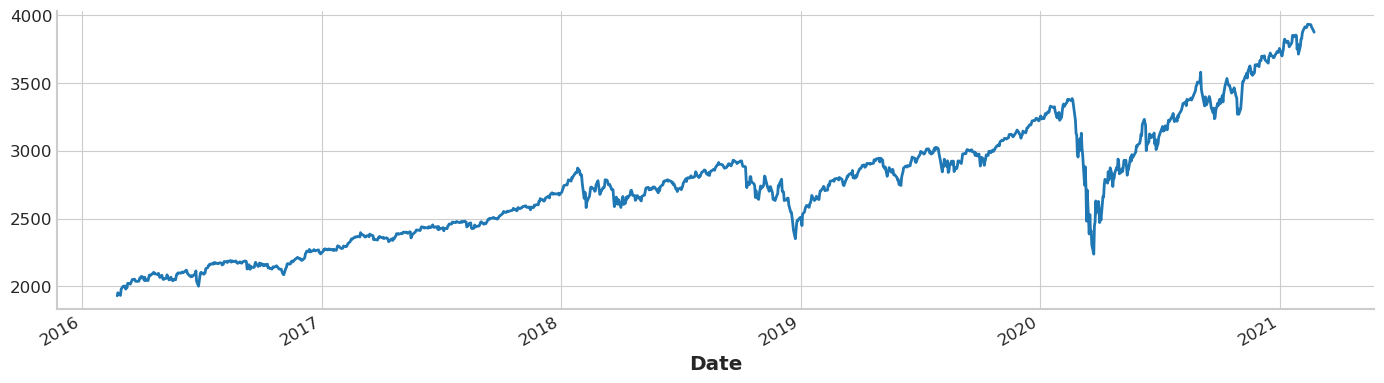

In [28]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

### NASDAQ Symbols

In [29]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9897 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     9897 non-null   bool    
 1   Security Name     9897 non-null   object  
 2   Listing Exchange  9897 non-null   category
 3   Market Category   9897 non-null   object  
 4   ETF               9897 non-null   bool    
 5   Round Lot Size    9897 non-null   float64 
 6   Test Issue        9897 non-null   bool    
 7   Financial Status  4191 non-null   category
 8   CQS Symbol        5706 non-null   object  
 9   NASDAQ Symbol     9897 non-null   object  
 10  NextShares        9897 non-null   bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 522.2+ KB


### Tiingo

Requires [signing up](https://api.tiingo.com/) and storing API key in environment

In [30]:
df = web.get_data_tiingo('GOOG', api_key=os.getenv('TIINGO_API_KEY'))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, ('GOOG', Timestamp('2016-02-24 00:00:00+0000', tz='UTC')) to ('GOOG', Timestamp('2021-02-22 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1258 non-null   float64
 1   high         1258 non-null   float64
 2   low          1258 non-null   float64
 3   open         1258 non-null   float64
 4   volume       1258 non-null   int64  
 5   adjClose     1258 non-null   float64
 6   adjHigh      1258 non-null   float64
 7   adjLow       1258 non-null   float64
 8   adjOpen      1258 non-null   float64
 9   adjVolume    1258 non-null   int64  
 10  divCash      1258 non-null   float64
 11  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.0+ KB
